In [3]:
# Simple CNN for the MNIST Dataset

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.2853 - acc: 0.9199 - val_loss: 0.0913 - val_acc: 0.9717
Epoch 2/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0872 - acc: 0.9735 - val_loss: 0.0593 - val_acc: 0.9801
Epoch 3/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0634 - acc: 0.9805 - val_loss: 0.0445 - val_acc: 0.9845
Epoch 4/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0509 - acc: 0.9845 - val_loss: 0.0356 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0432 - acc: 0.9866 - val_loss: 0.0343 - val_acc: 0.9869
Epoch 6/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0365 - acc: 0.9884 - val_loss: 0.0352 - val_acc: 0.9879
Epoch 7/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.0320 - acc: 0.9899 - val_loss: 0.

9
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000]


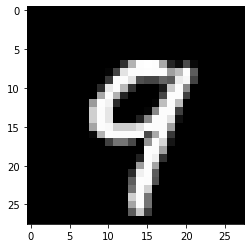

[0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 99.999]


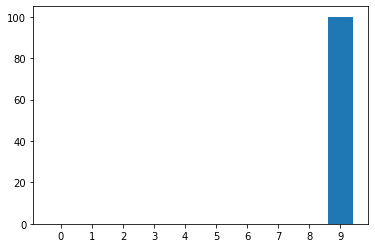

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:.3f}'.format})
image = 12
ynew = model.predict_classes(X_test[image:image+1])
yhat = model.predict(X_test[image:image+1])
print(ynew[0])
print((y_test[image]))
plt.imshow(X_test[image], cmap=plt.get_cmap('gray'))
plt.show();

print(yhat[0]*100)
plt.bar(x=list(np.arange(0,10,1)),height=list(yhat[0]*100))
plt.xticks(list(np.arange(0,10,1)))
plt.show();